## Teerameth Rassameecharoenchai
# 61340500032

# Object Recognition

The objective of this lab is very simple, to recognize objects in images. You will be working with a well-known dataset called CIFAR-10.

You can learn more about this dataset and download it here:

https://www.cs.toronto.edu/~kriz/cifar.html

In the webpage above, they also included a few publications based on CIFAR-10 data, which showed some amazing accuracies. The worst network on the page (a shallow convolutional neural network) can classify images with rouhgly 75% accuracy.

# 1. Write a function to load data

The dataset webpage in the previous section also provide a simple way to load data from your harddrive using pickle. You may use their function for this exercise.

Construct two numpy arrays for train images and train labels from data_batch_1 to data_batch_5. Then, construct two numpy arrays for test images, and test labels from test batch file. The original image size is 32 x 32 x 3. You may flatten the arrays so the final arrays are of size 1 x 3072.

In [1]:
# Using dataset & loding function from https://www.cs.toronto.edu/~kriz/cifar.html

import numpy as np
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
# Extract downloaded file in same folder
file_path = 'cifar-10-python/cifar-10-batches-py/'
file_names_train = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
file_name_test = 'test_batch'

In [2]:
dataset_test = unpickle(file_path+file_name_test)
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_test = dataset_test[b'data']
y_test = dataset_test[b'labels']
print("Testing set contain %d images."%X_test.shape[0]) # got (10000, 3072)
X_train = []
y_train = []
for file_name_train in file_names_train:
    dataset_train = unpickle(file_path+file_name_train)
    # concatenate training set to single list
    X_train.append(dataset_train[b'data'])
    y_train = y_train+dataset_train[b'labels']
X_train = np.concatenate(tuple(X_train), axis=0)
print("Training set contain %d images."%X_train.shape[0]) # got (50000, 3072)

Testing set contain 10000 images.
Training set contain 50000 images.


# 2. Classify Dogs v.s. Cats

Let’s start simple by creating logistic regression model to classify images. We will select only two classes of images for this exercise.

1. From 50,000 train images and 10,000 test images, we want to reduce the data size. Write code to filter only dog images (label = 3) and cat images (label = 5).
2. Create a logistic regression model to classify cats and dogs. Report your accuracy.

วง loop เพื่อกรองออกมาเฉพาะ class 3 และ 5

In [3]:
# CAT -> label 3
# DOG -> label 5
cat_vs_dog = {'X_train':[], 'y_train':[], 'X_test':[], 'y_test':[]}
for i in range(X_train.shape[0]):
    if y_train[i] in [3, 5]:
        cat_vs_dog['X_train'].append(X_train[i])
        cat_vs_dog['y_train'].append(y_train[i])
print("Filtered training set: %d images."%len(cat_vs_dog['X_train']))
for i in range(X_test.shape[0]):
    if y_test[i] in [3, 5]:
        cat_vs_dog['X_test'].append(X_test[i])
        cat_vs_dog['y_test'].append(y_test[i])
print("Filtered testing set: %d images."%len(cat_vs_dog['X_test']))

Filtered training set: 10000 images.
Filtered testing set: 2000 images.


In [4]:
# Create Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
LR = LogisticRegression(max_iter=1000, random_state=136)
LR.fit(cat_vs_dog['X_train'], cat_vs_dog['y_train'])
y_pred = LR.predict(cat_vs_dog['X_test']) # Predict test set
print("Confusion Matrix")
print(confusion_matrix(cat_vs_dog['y_test'], y_pred))
print("Classification report")
print(classification_report(cat_vs_dog['y_test'], y_pred))
print("Accuracy")
print(accuracy_score(cat_vs_dog['y_test'], y_pred))

Confusion Matrix
[[538 462]
 [428 572]]
Classification report
              precision    recall  f1-score   support

           3       0.56      0.54      0.55      1000
           5       0.55      0.57      0.56      1000

    accuracy                           0.56      2000
   macro avg       0.56      0.55      0.55      2000
weighted avg       0.56      0.56      0.55      2000

Accuracy
0.555


/home/teera/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ได้ Accuracy ตำ่มาก ดีกว่าสุ่มแค่นิดเดียวเอง

# 3. The Real Challenge

The majority of your score for this lab will come from this real challenge. You are going to construct a neural network model to classify 10 classes of images from CIFAR-10 dataset. You will get half the credits for this one if you complete the assignment, and will get another half if you can exceed the target accuracy of 75%. (You may use any combination of sklearn, opencv, or tensorflow to do this exercise).

Design at least 3 variants of neural network models. Each model should have different architectures. (Do not vary just a few parameters, the architecture of the network must change in each model). In your notebook, explain your experiments in details and display the accuracy score for each experiment.

ใช้ CNN เนื่องจากเหมาะสมกับการ classify ข้อมูลที่เป็นภาพ

และต้อง Preprocess ภาพก่อนเนื่องจากข้อมูลภาพที่ให้มาถูก flatten ไปแล้วแต่เราต้องการทำ convolution ก่อนเลยต้องแปลงกลับเป็น (32,32,3)

ใน web ของ cifar-10 บอกว่า

"data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image."

ก็เลยใช้ NumPy ในการแปลงภาพตามคำอธิบายดังกล่าวได้แบบนี้เพื่อให้ได้เป็นภาพในแบบ BGR ตามมาตรฐาน OpenCV

In [5]:
X_train = [np.transpose(np.reshape(X_train[i],(3,32,32)), (1,2,0)) for i in range(len(X_train))]
X_test = [np.transpose(np.reshape(X_test[i], (3,32,32)), (1,2,0)) for i in range(len(X_test))]

frog


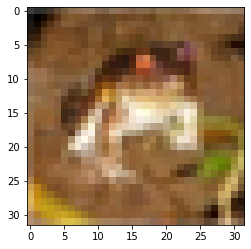

truck


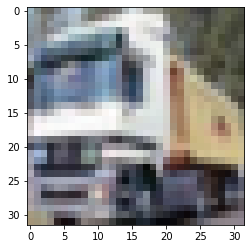

truck


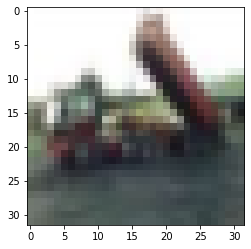

deer


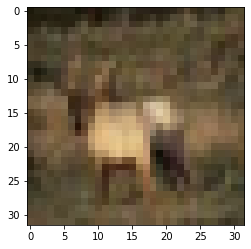

automobile


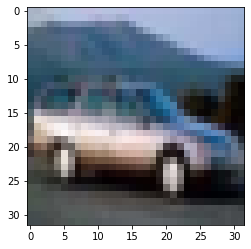

cat


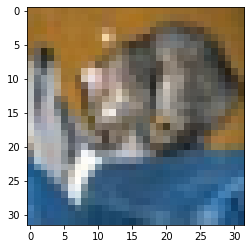

ship


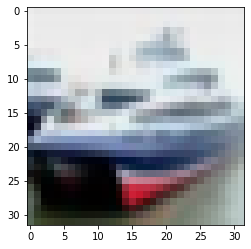

ship


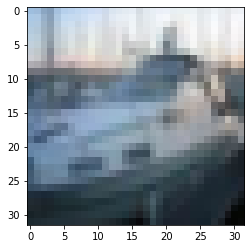

airplane


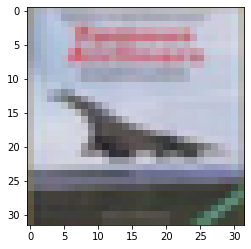

frog


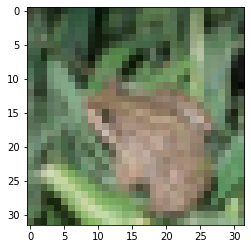

In [6]:
# ลองตรวจดูว่าแปลง array มาถูกมั้ย

import matplotlib.pyplot as plt
# Training set
for i in range(5):
    print(classes_name[y_train[i]])
    plt.imshow(X_train[i])
    plt.show()
# Test set
for i in range(5):
    print(classes_name[y_test[i]])
    plt.imshow(X_test[i])
    plt.show()

ใช้ model เดียวกับที่ใช้ใน AI ของ Module8-9
ใช้ optimizer เป็น SGD

In [7]:
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense, Dropout

# Scale dataset in to range [0, 1]
trainX = np.asarray(X_train).astype("float") / 255.0
testX = np.asarray(X_test).astype("float") / 255.0
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(y_train)
testY = lb.transform(y_test)

## Model 1: ShallowNet (ไม่ได้ทำ custom convolution layer เองแบบใน module)
INPUT => CONV => RELU => FC
ใช้แค่ 1 convolution layer แล้ว flatten เข้า fully connected layer เลย

In [8]:
# Build model

class ShallowNet:
	@staticmethod
	def build():
		model = Sequential()
		model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32,32,3))) # input shape=(32,32,3)
		model.add(Activation("relu"))
		model.add(Flatten())
		model.add(Dense(10)) # 10 classes
		model.add(Activation("softmax"))
		return model

In [9]:
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = ShallowNet.build()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=1)
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=classes_name))

Epoch 1/40
782/782 [==============================] - 6s 5ms/step - loss: 1.7642 - accuracy: 0.3736 - val_loss: 1.4586 - val_accuracy: 0.4749

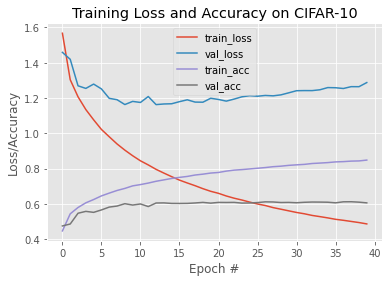

In [10]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Validation loss ลู่เข้าตั้งแต่ epoch ที่ 10 แล้ว หลังจากนั้นเริ่ม overfit

## Model 2: LeNet
### (modified version of Yann Lecun's LeNet)
INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC
ลอกมาจาก architecture ของ LeNet ต้นฉบับแต่เปลี่ยน activation function
มีการทำ max pooling ขนาด 2x2 จำนวน 2 รอบเพิ่มเข้ามาจาก ShallowNet

In [11]:
class LeNet:
	@staticmethod
	def build(activation="relu", n_conv1=20, n_conv2=50, conv_size=(5,5), n_fc=500):
		model = Sequential()
		model.add(Conv2D(n_conv1, conv_size, padding="same", input_shape=(32,32,3)))
		model.add(Activation(activation))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		model.add(Conv2D(n_conv2, conv_size, padding="same"))
		model.add(Activation(activation))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		model.add(Flatten())
		model.add(Dense(n_fc))
		model.add(Activation(activation))
		model.add(Dense(10)) # 10 classes
		model.add(Activation("softmax"))
		return model

In [12]:
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = LeNet.build()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=1)
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=classes_name))

Epoch 1/40
782/782 [==============================] - 9s 8ms/step - loss: 1.8002 - accuracy: 0.3470 - val_loss: 1.2750 - val_accuracy: 0.5511

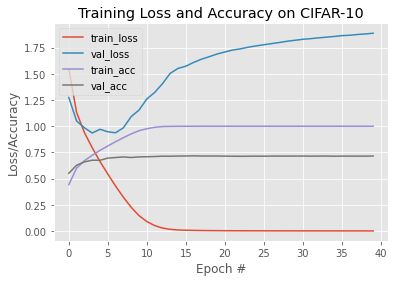

In [13]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

Validation loss ลู่เข้าตั้งแต่ epoch ที่ 5 หลังจากนั้นเกิด overfitting จน val_loss กระโดดแต่ loss ยังคงลดลงเรื่อย ๆ
น่าจะลองลดจำนวน neuron ใน Fully Connected Layer ดู

## Model 3: MiniVGGNet (ลอกมาจาก https://github.com/matvi/miniVGGNet/blob/master/cnn/MiniVGGNet.py)
INPUT => CONV => RELU => BN => CONV =>
RELU => BN => POOL => DROPOUT => CONV =>
RELU => BN => CONV => RELU => BN => POOL =>
DROPOUT => FC => RELU => BN => DROPOUT =>
FC => SOFTMAX

เพิ่ม Batch Normalization Layer เข้าไปเพื่อให้การ train มีสเถียรภาพมากขึ้นและเพิ่ม Dropout Layer เพื่อลดการเกิด overfitting

In [14]:
class MiniVGGNet:
	@staticmethod
	def build(conv_size=(3,3), pool_size=(2,2), dropout1=0.25, n_conv1=32, n_conv2=32, n_conv3=64, n_conv4=64, dropout2=0.25, n_fc=512, dropout3=0.5):
		model = Sequential()
		model.add(Conv2D(n_conv1, conv_size, padding="same", input_shape=(32,32,3)))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(n_conv2, conv_size, padding="same"))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=pool_size))
		model.add(Dropout(dropout1))
		model.add(Conv2D(n_conv3, conv_size, padding="same"))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(Conv2D(n_conv4, conv_size, padding="same"))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis=-1))
		model.add(MaxPooling2D(pool_size=pool_size))
		model.add(Dropout(dropout2))
		model.add(Flatten())
		model.add(Dense(n_fc))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(dropout3))
		model.add(Dense(10)) # 10 classes
		model.add(Activation("softmax"))
		return model

In [15]:
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = MiniVGGNet.build()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=40, verbose=1)
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=classes_name))

Epoch 1/40
782/782 [==============================] - 19s 16ms/step - loss: 2.0254 - accuracy: 0.3684 - val_loss: 1.1937 - val_accuracy: 0.5718

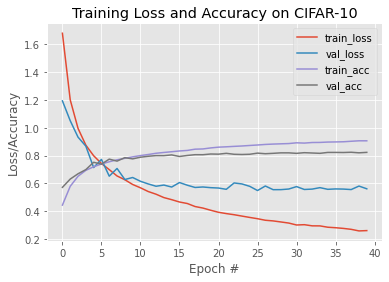

In [16]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on CIFAR-10")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()